In [125]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Объединение полученных данных

In [126]:
input_learn = scipy.io.loadmat('input_learn.mat')
input_test = scipy.io.loadmat('input_test.mat')

result_learn = scipy.io.loadmat('result_learn.mat')
result_test = scipy.io.loadmat('result_test.mat')

In [127]:
# Я создаю один общий DataFrame, далее уже буду разбивать как удобно
df_input_l = pd.DataFrame(input_learn['input'])
df_input_t = pd.DataFrame(input_test['input'])

df_result_l = pd.DataFrame(result_learn['result'])
df_result_t = pd.DataFrame(result_test['result'])

In [128]:
# Сначала соединяем снизу соответствующие input из обучающей и тестовой выборки
input_group_10e1 = pd.concat([df_input_l[:10000], df_input_t[:10000]], ignore_index=True)
input_group_10e2 = pd.concat([df_input_l[10000:20000], df_input_t[10000:20000]], ignore_index=True)
input_group_10e3 = pd.concat([df_input_l[20000:30000], df_input_t[20000:30000]], ignore_index=True)
input_group_10e4 = pd.concat([df_input_l[30000:], df_input_t[30000:40000]], ignore_index=True)

In [129]:
# Аналогично соединяем results
result_group_10e1 = pd.concat([df_result_l[:10000], df_result_t[:10000]], ignore_index=True)
result_group_10e2 = pd.concat([df_result_l[10000:20000], df_result_t[10000:20000]], ignore_index=True)
result_group_10e3 = pd.concat([df_result_l[20000:30000], df_result_t[20000:30000]], ignore_index=True)
result_group_10e4 = pd.concat([df_result_l[30000:], df_result_t[30000:]], ignore_index=True)

In [130]:
# Далее конкатинацией справа мы склеиваем нужные части из input'ов и result'ов
full_group_e1 = pd.concat([input_group_10e1, result_group_10e1], axis=1, ignore_index=True)
full_group_e2 = pd.concat([input_group_10e2, result_group_10e2], axis=1, ignore_index=True)
full_group_e3 = pd.concat([input_group_10e3, result_group_10e3], axis=1, ignore_index=True)
full_group_e4 = pd.concat([input_group_10e4, result_group_10e4], axis=1, ignore_index=True)

In [131]:
# И финальная конкатенация, где мы все соединяем в один большой DataFrame из 80000 строк и 21 столбцов
data = pd.concat([full_group_e1, full_group_e2, full_group_e3, full_group_e4], ignore_index=True)
MAE = []
MSE = []
RMSE = []

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       80000 non-null  float64
 1   1       80000 non-null  float64
 2   2       80000 non-null  float64
 3   3       80000 non-null  float64
 4   4       80000 non-null  float64
 5   5       80000 non-null  float64
 6   6       80000 non-null  float64
 7   7       80000 non-null  float64
 8   8       80000 non-null  float64
 9   9       80000 non-null  float64
 10  10      80000 non-null  float64
 11  11      80000 non-null  float64
 12  12      80000 non-null  float64
 13  13      80000 non-null  float64
 14  14      80000 non-null  float64
 15  15      80000 non-null  float64
 16  16      80000 non-null  float64
 17  17      80000 non-null  float64
 18  18      80000 non-null  float64
 19  19      80000 non-null  float64
 20  20      80000 non-null  float64
dtypes: float64(21)
memory usage: 12.8 M

# Линейная Регрессия

MAE: 2487.2684360775397
MSE: 30094560.745897807
RMSE: 5485.85095914005
R^2: 0.9978288568823274


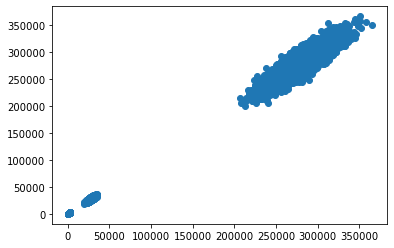

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(20, axis=1, inplace=False), data[20], test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

predictions = lm1.predict(X_test)
plt.scatter(y_test,predictions)

from sklearn import metrics
MAE.append(metrics.mean_absolute_error(y_test, predictions))
MSE.append(metrics.mean_squared_error(y_test, predictions))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('MAE:', MAE[0])
print('MSE:', MSE[0])
print('RMSE:', RMSE[0])
print('R^2:', metrics.r2_score(y_test, predictions))

# plt.savefig('Linear_Regression_TestSize=30%')

# Степень 2

MAE: 2198.30305453333
MSE: 23858376.881937236
RMSE: 4884.503749812998
R^2: 0.9982787603645912


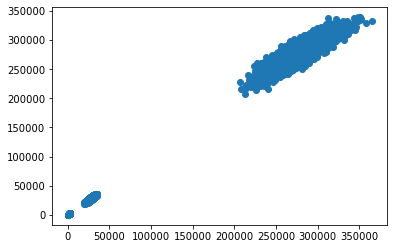

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(20, axis=1, inplace=False), data[20], test_size=0.3, random_state=101)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)


from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

predictions = lm2.predict(X_test)
plt.scatter(y_test,predictions)

from sklearn import metrics
MAE.append(metrics.mean_absolute_error(y_test, predictions))
MSE.append(metrics.mean_squared_error(y_test, predictions))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('MAE:', MAE[1])
print('MSE:', MSE[1])
print('RMSE:', RMSE[1])
print('R^2:', metrics.r2_score(y_test, predictions))

# plt.savefig('Polynomial_Regression_2Degree_TestSize=30%')

In [135]:
pd.concat([y_test[:12].reset_index(drop=True), pd.Series(predictions[:12])], axis=1).rename(columns={20:'True Results', 0:'Predictions'})

,True Results,Predictions
0,263997.595451,261068.010481
1,30050.935987,29924.843221
2,3335.684044,3203.614431
3,268247.041152,268291.800569
4,27742.576169,28879.579855
5,296288.854594,286652.885266
6,275.191211,211.405118
7,295203.928414,287060.317578
8,293828.674973,283642.619375
9,253698.230523,258826.251789


# Степень 3

MAE: 2277.1514933940553
MSE: 26827916.695941497
RMSE: 5179.567230564876
R^2: 0.9980645257730227


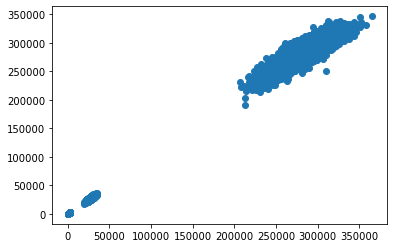

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(20, axis=1, inplace=False), data[20], test_size=0.3, random_state=101)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)


from sklearn.linear_model import LinearRegression
lm3 = LinearRegression()
lm3.fit(X_train,y_train)

predictions = lm3.predict(X_test)
plt.scatter(y_test,predictions)

from sklearn import metrics
MAE.append(metrics.mean_absolute_error(y_test, predictions))
MSE.append(metrics.mean_squared_error(y_test, predictions))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('MAE:', MAE[2])
print('MSE:', MSE[2])
print('RMSE:', RMSE[2])
print('R^2:', metrics.r2_score(y_test, predictions))

# plt.savefig('Polynomial_Regression_3Degree_TestSize=30%')

# Эксперименты с размером тестовой выборки

## Линейная регрессия 80% test size

MAE: 2508.5419725288184
MSE: 30773046.123303097
RMSE: 5547.345862960331
R^2: 0.9977746187284728


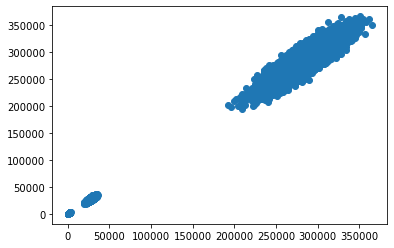

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(20, axis=1, inplace=False), data[20], test_size=0.8, random_state=101)

from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

predictions = lm1.predict(X_test)
plt.scatter(y_test,predictions)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', metrics.r2_score(y_test, predictions))

# plt.savefig('Linear_Regression_TestSize=80%')

## 2-я Степень 80%

MAE: 2254.8814593193238
MSE: 25375958.40851499
RMSE: 5037.455549036139
R^2: 0.9981649141146739


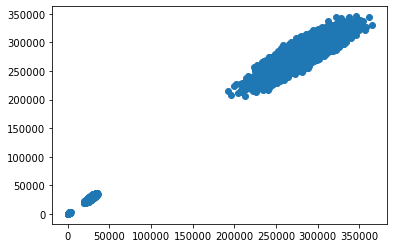

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(20, axis=1, inplace=False), data[20], test_size=0.8, random_state=101)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)


from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

predictions = lm2.predict(X_test)
plt.scatter(y_test,predictions)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', metrics.r2_score(y_test, predictions))

# plt.savefig('Polynomial_Regression_2Degree_TestSize=80%')

## 3-я Степень 80% 

MAE: 2913.1803763638463
MSE: 48102677.599618584
RMSE: 6935.609389204281
R^2: 0.9965214104118396


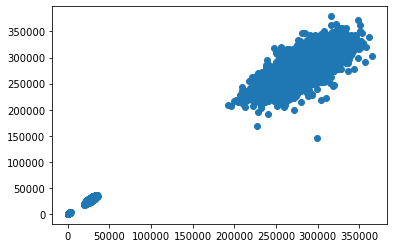

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(20, axis=1, inplace=False), data[20], test_size=0.8, random_state=101)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)


from sklearn.linear_model import LinearRegression
lm3 = LinearRegression()
lm3.fit(X_train,y_train)

predictions = lm3.predict(X_test)
plt.scatter(y_test,predictions)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:',metrics.r2_score(y_test, predictions))

# plt.savefig('Polynomial_Regression_3Degree_TestSize=80%')